In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
# iris.key() -> 정보 나옴
# data : 꽃의 특성, target:품종숫자(0,1,2), target_names:품종이름 ['setosa' 'versicolor' 'virginica']
# feature_names : 특성(열) 이름(꽃받침 길이, 너비, 꽃잎 길이, 너비)
# DESCR : 데이터셋에 대한 설명, filename : 데이터 파일 경로

#pd.DataFrame(data, columns=[열이름]) -> 기본형태
df=pd.DataFrame(iris.data, columns=iris.feature_names)


In [ ]:
#데이터의 크기(행,열)와 각 변수의 데이터 타입 출력하는 코드
print('행과 열의 숫자 :', df.shape) # 행열의 숫자
print(df.info()) # 각 변수의 정보
print('변수의 데이터 타입\n', df.dtypes) # 각 변수의 데이터 타입 정보

행과 열의 숫자 : (150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
변수의 데이터 타입
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In [3]:
# 각 변수의 통계를 .describe() 함수로 산출
print(df.describe())
# count:값이 있는 항목의 수, mean:평균, std:표준편차, min:최소값, 
# 25%:1사분위수, 50%:중앙값, 75%:3사분위수, max:최대값

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


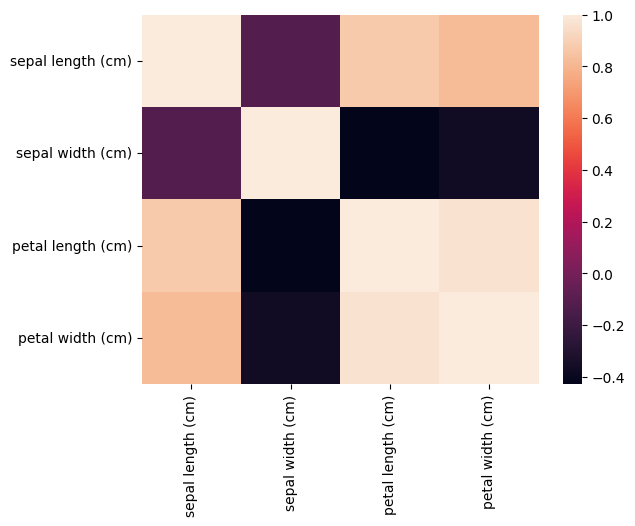

In [4]:
# 변수 간 상관관계를 corr() 함수로 계산
print(df.corr())

# 상관관계를 seaborn의 heatmap을 이용하여 시각화 seaborn.heatmap(data, **kwargs) -> 기본 형태
import seaborn as sns
import matplotlib.pyplot as plt #히트맵 그래프를 화면에 표시하기 위함

sns.heatmap(df.corr())
plt.show() # 주피터 노트북은 자동으로 그래프 그려줘서 필요 없지만 일반 스크립트 파일에서는 필요

# 상관관계가 가장 높은 변수 쌍 : petal width & petal length (꽃잎 너비와 꽃잎 길이)
# 상관관계가 가장 낮은 변수 쌍 : petal width & sepal width (꽃잎 너비와 꽃받침 너비)

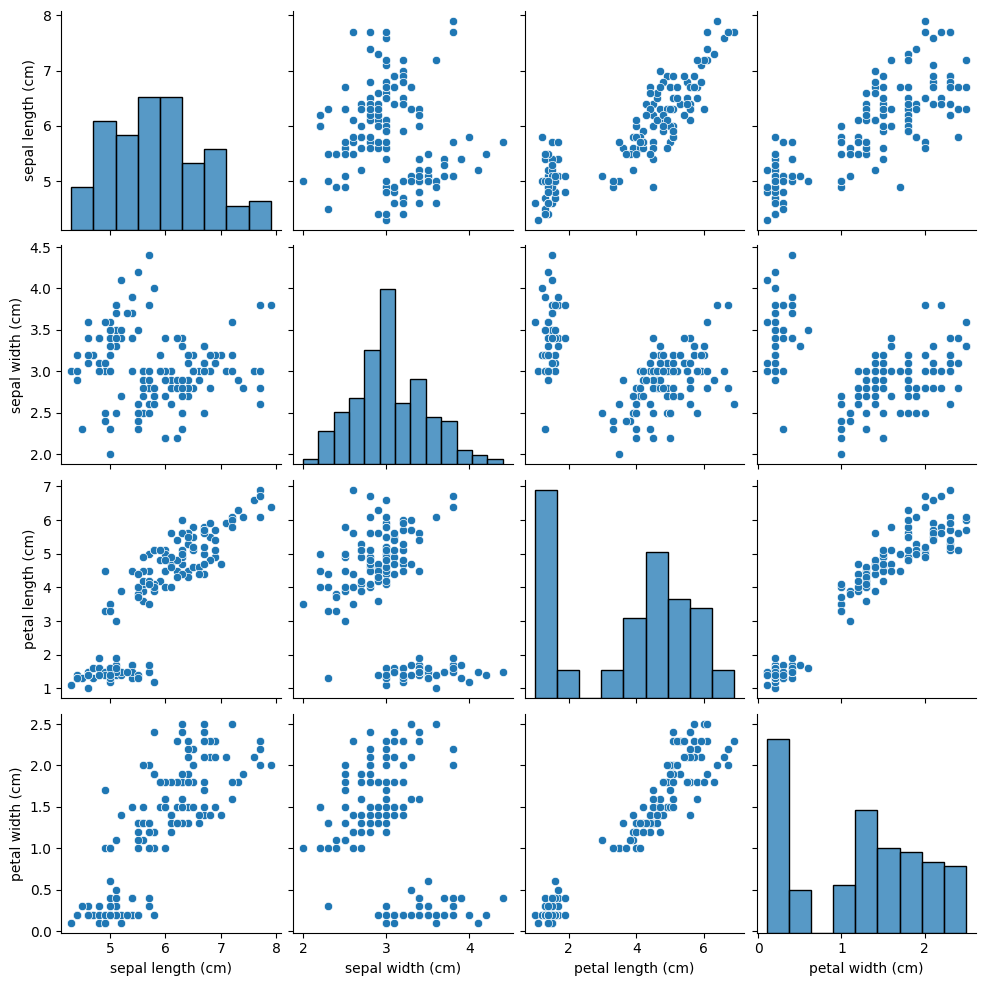

In [5]:
#pairplot 함수를 이용하여 산점도 그리기
sns.pairplot(df)
plt.show()

#petal length와 petal width는 서로 높은 상관관계를 보임, 꽃잎의 길이가 길면 너비도 큰 경향을 보임
#sepal length와 petal length도 상관관계가 높음, 꽃받침의 길이가 길면 꽃잎의 길이도 길어지는 경향

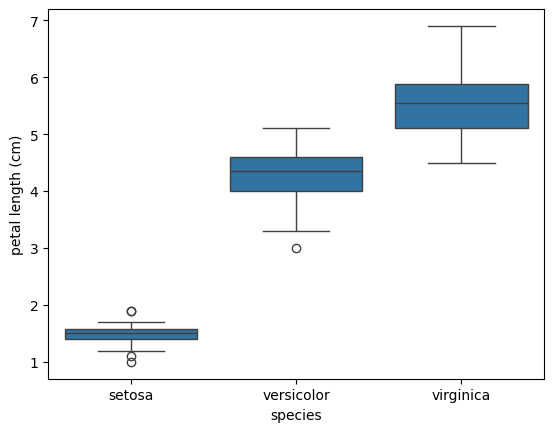

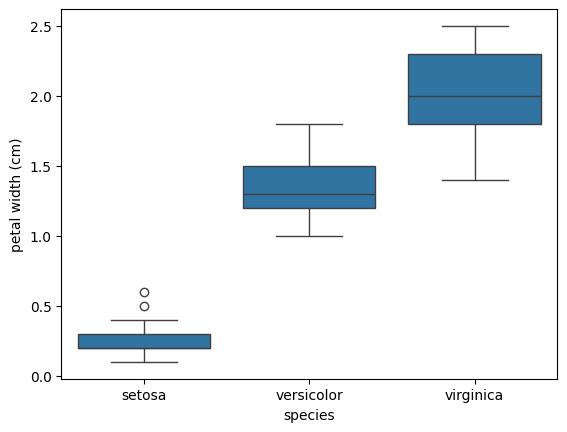

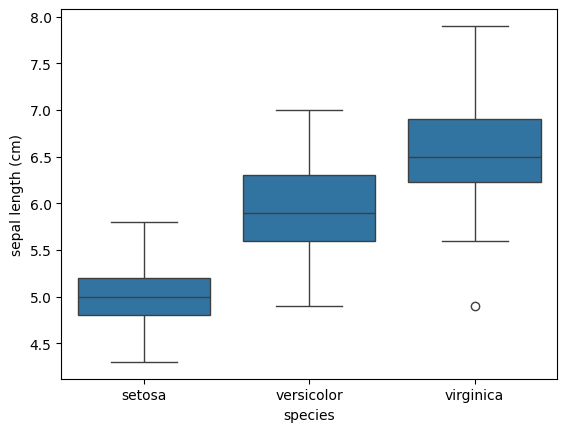

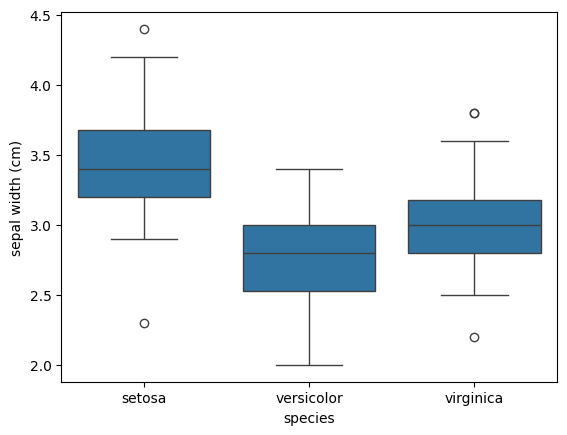

In [6]:
#boxplot을 사용한 품종별 변수 분포 시각화

#품종 정보(target)를 df에 추가
df['species'] = iris.target

#숫자로 출력된 target를 품종 이름으로 변환
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)

#print(df.head())로 확인

#boxplot 사용
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.show()
# 꽃잎 길이 : setosa는 1~2cm 사이, versicolor는 4~5cm 사이, virginica는 5~6cm 사이에 주로 분포

sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.show()
# 꽃잎 너비 : setosa는 0~0.5cm 사이, versicolor는 1~1.5cm 사이, virginica는 1.7~2.3cm 사이에 주로 분포

sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.show()
# 꽃받침 길이 : setosa는 4.7~5.2cm 사이, versicolor는 5.6~6.4cm 사이, virginica는 6.2~6.8cm 사이에 주로 분포

sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.show()
# 꽃받침 너비 : setosa는 3.2~3.7cm 사이, versicolor는 2.5~3cm 사이, virginica는 2.8~3.2cm 사이에 주로 분포

In [7]:
#ANOVA 검정 : 세 개 이상의 그룹 간의 평균 차이가 유의미한지 여부 판단하는 검정  
import scipy.stats as stats

# f_stat : F통계량, 그룹간의 평균차이
# p_value:귀무가설의 평가
# stats.f_oneway(): scipy.stats의 ANOVA 함수
# 꽃받침 길이를 품종별로 그룹화하여 ANOVA 검정 수행
results = [] # 결과값을 표로 작성하기 위한 변수

f_stat, p_value = stats.f_oneway(
    df[df['species']=='setosa']['sepal length (cm)'],
    df[df['species']=='versicolor']['sepal length (cm)'],
    df[df['species']=='virginica']['sepal length (cm)']
)
results.append(['Sepal Length', f_stat, p_value])

# p-value가 0.05 이상이라 품종 간 꽃받침 길이의 평균 차이가 유의미함

# 같은 방법으로 각 변수별 검정 시행
f_stat, p_value = stats.f_oneway(
    df[df['species']=='setosa']['sepal width (cm)'],
    df[df['species']=='versicolor']['sepal width (cm)'],
    df[df['species']=='virginica']['sepal width (cm)']
)
results.append(['Sepal Width', f_stat, p_value])

# p-value가 0.05 이상이라 품종 간 꽃받침 너비의 평균 차이가 유의미함


f_stat, p_value = stats.f_oneway(
    df[df['species']=='setosa']['petal width (cm)'],
    df[df['species']=='versicolor']['petal width (cm)'],
    df[df['species']=='virginica']['petal width (cm)']
)
results.append(['Petal Width', f_stat, p_value])

# p-value가 0.05 이상이라 품종 간 꽃잎 너비의 평균 차이가 유의미함

f_stat, p_value = stats.f_oneway(
    df[df['species']=='setosa']['petal length (cm)'],
    df[df['species']=='versicolor']['petal length (cm)'],
    df[df['species']=='virginica']['petal length (cm)']
)
results.append(['Petal Length', f_stat, p_value])

# p-value가 0.05 이상이라 품종 간 꽃잎 길이의 평균 차이가 유의미함
# 가장 차이가 두드러지는 변수

#ANOVA 결과를 DataFrame으로 변환
anova_results_df = pd.DataFrame(results, columns=['Variable', 'F-statistic', 'P-value'])

print(anova_results_df)


       Variable  F-statistic       P-value
0  Sepal Length   119.264502  1.669669e-31
1   Sepal Width    49.160040  4.492017e-17
2   Petal Width   960.007147  4.169446e-85
3  Petal Length  1180.161182  2.856777e-91


In [8]:
#붓꽃 데이터를 훈련 세트와 테스트 세트로 나누기 (7:3)
from sklearn.model_selection import train_test_split

X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print('훈련 세트 크기:', X_train.shape)
print('테스트 세트 크기:', X_test.shape)

훈련 세트 크기: (105, 4)
테스트 세트 크기: (45, 4)


In [9]:
#결정트리와 로지스틱 회귀를 위한 작업
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#결정 트리 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

#모델 훈련
dt_model.fit(X_train, y_train)

#예측
y_pred_dt = dt_model.predict(X_test)

#정확도 평가
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

#정확도가 1.0이 나옴


Decision Tree Accuracy: 1.0


In [10]:
#로지스틱 회귀 모델 생성
lr_model = LogisticRegression(max_iter=200, random_state=42)

#모델 훈련
lr_model.fit(X_train, y_train)

#예측
y_pred_lr = lr_model.predict(X_test)

#정확도 평가
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

#정확도가 1.0이 나옴

Logistic Regression Accuracy: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

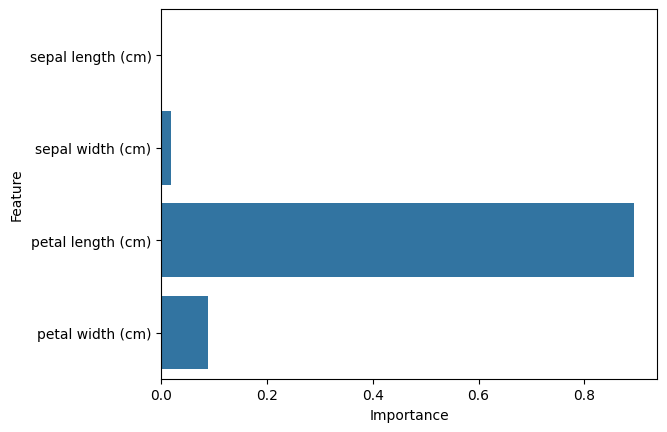

In [11]:
#결정 트리 모델의 특성 중요도 추출
feature_importances = dt_model.feature_importances_

#데이터 프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance' : feature_importances
})

#시각화
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.show

#가장 중요한 변수는 petal length

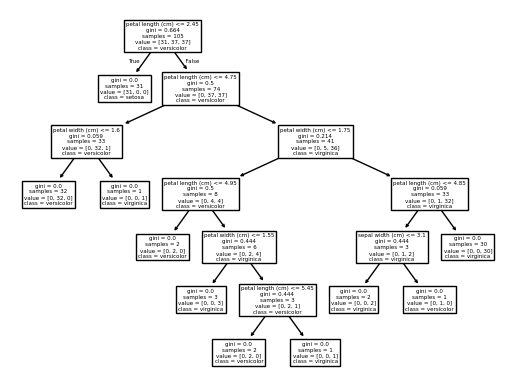

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal 

In [12]:
#결정트리 시각화 plot_tree()
from sklearn.tree import plot_tree
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

#결정트리 시각화 export_text
from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=iris.feature_names)
print(tree_rules)
